In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import bz2,pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7836\3926011492.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df = pd.read_csv('forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
df['size_category'] = np.where(df['area']>6, '1', '0')
df.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


In [4]:
df['size_category']=pd.to_numeric(df['size_category'])

In [5]:
df.isnull().sum()

X                0
Y                0
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

Text(0.5, 1.0, 'Count plot of months')

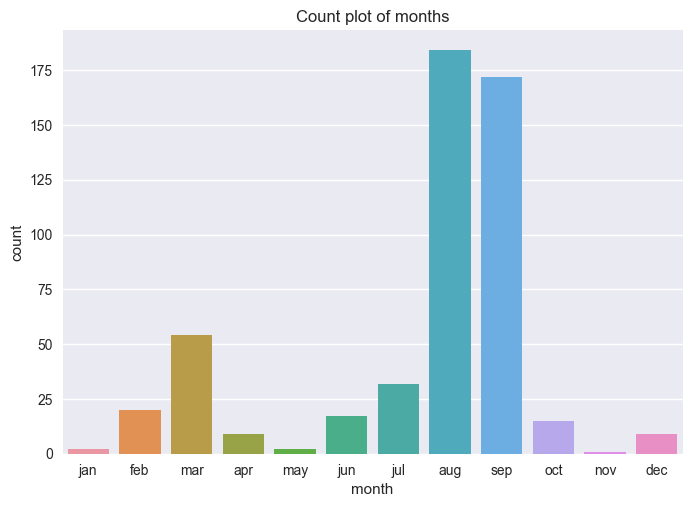

In [6]:
df['month'] = pd.Categorical(df['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
sns.countplot(x='month', data=df)
plt.title('Count plot of months')

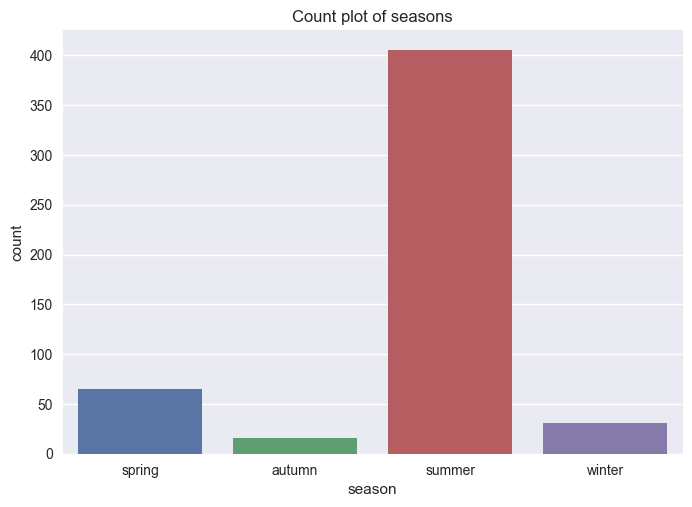

In [7]:
# dictionary of months mapping to seasons
season_dict = {'dec': 'winter', 'jan': 'winter', 'feb': 'winter',
               'mar': 'spring', 'apr': 'spring', 'may': 'spring',
               'jun': 'summer', 'jul': 'summer', 'aug': 'summer', 'sep': 'summer',
               'oct': 'autumn', 'nov': 'autumn'}

# Check if the 'month' column exists in the DataFrame
if 'month' in df.columns:
    # create a new column 'season' by mapping 'month' column using the season_dict
    df['season'] = df['month'].map(season_dict)

    # visualize data
    sns.countplot(data=df, x='season')
    plt.title('Count plot of seasons')

    # display the plot
    plt.show()
else:
    print("The 'month' column does not exist in the DataFrame.")

In [8]:
df['season'].value_counts()

summer    405
spring     65
winter     31
autumn     16
Name: season, dtype: int64

Text(0.5, 1.0, 'Count plot of summer vs other seasons')

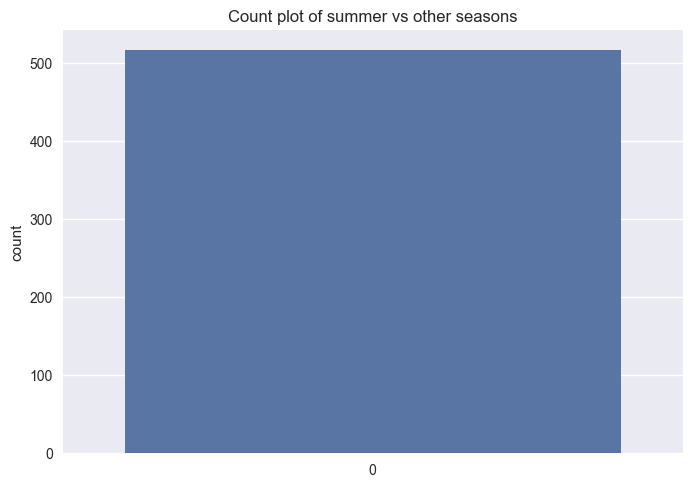

In [9]:
# converting to is summer
df['season'] = (df['season'] == 'summer')

# renaming column
df = df.rename(columns = {'season' : 'is_summer'})

# visualizing data
sns.countplot(df['is_summer'])
plt.title('Count plot of summer vs other seasons')

Text(0.5, 1.0, 'Count plot of days')

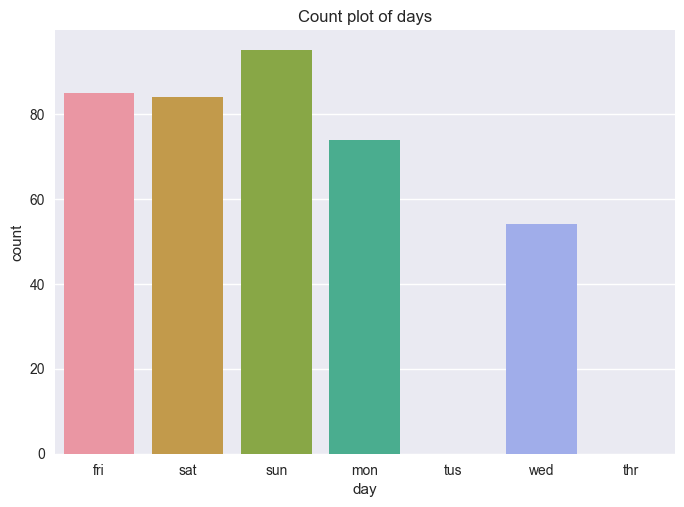

In [10]:
df['day'] = pd.Categorical(df['day'], categories=['fri', 'sat', 'sun','mon', 'tus', 'wed', 'thr'])
sns.countplot(x='day', data=df)
# sns.countplot(df['day'])
plt.title('Count plot of days')

Text(0.5, 1.0, 'Count plot of weekend vs weekday')

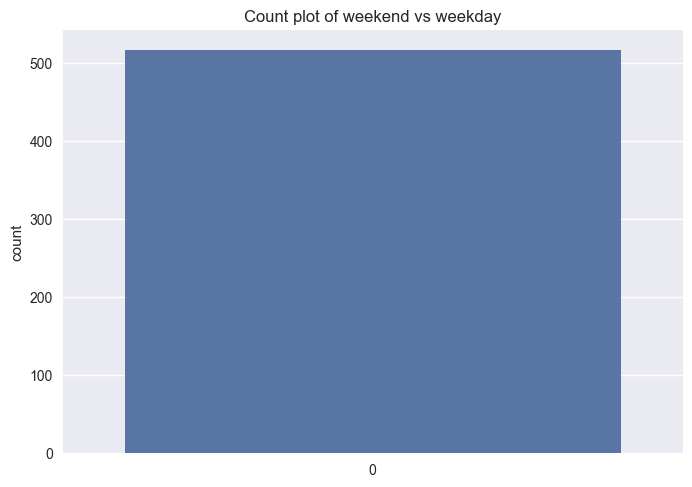

In [11]:
# converting to is weekend
df['day'] = ((df['day'] == 'sun') | (df['day'] == 'sat') | (df['day'] == 'fri'))

# renaming column
df = df.rename(columns = {'day' : 'is_weekend'})

# visualizing
sns.countplot(df['is_weekend'])
plt.title('Count plot of weekend vs weekday')

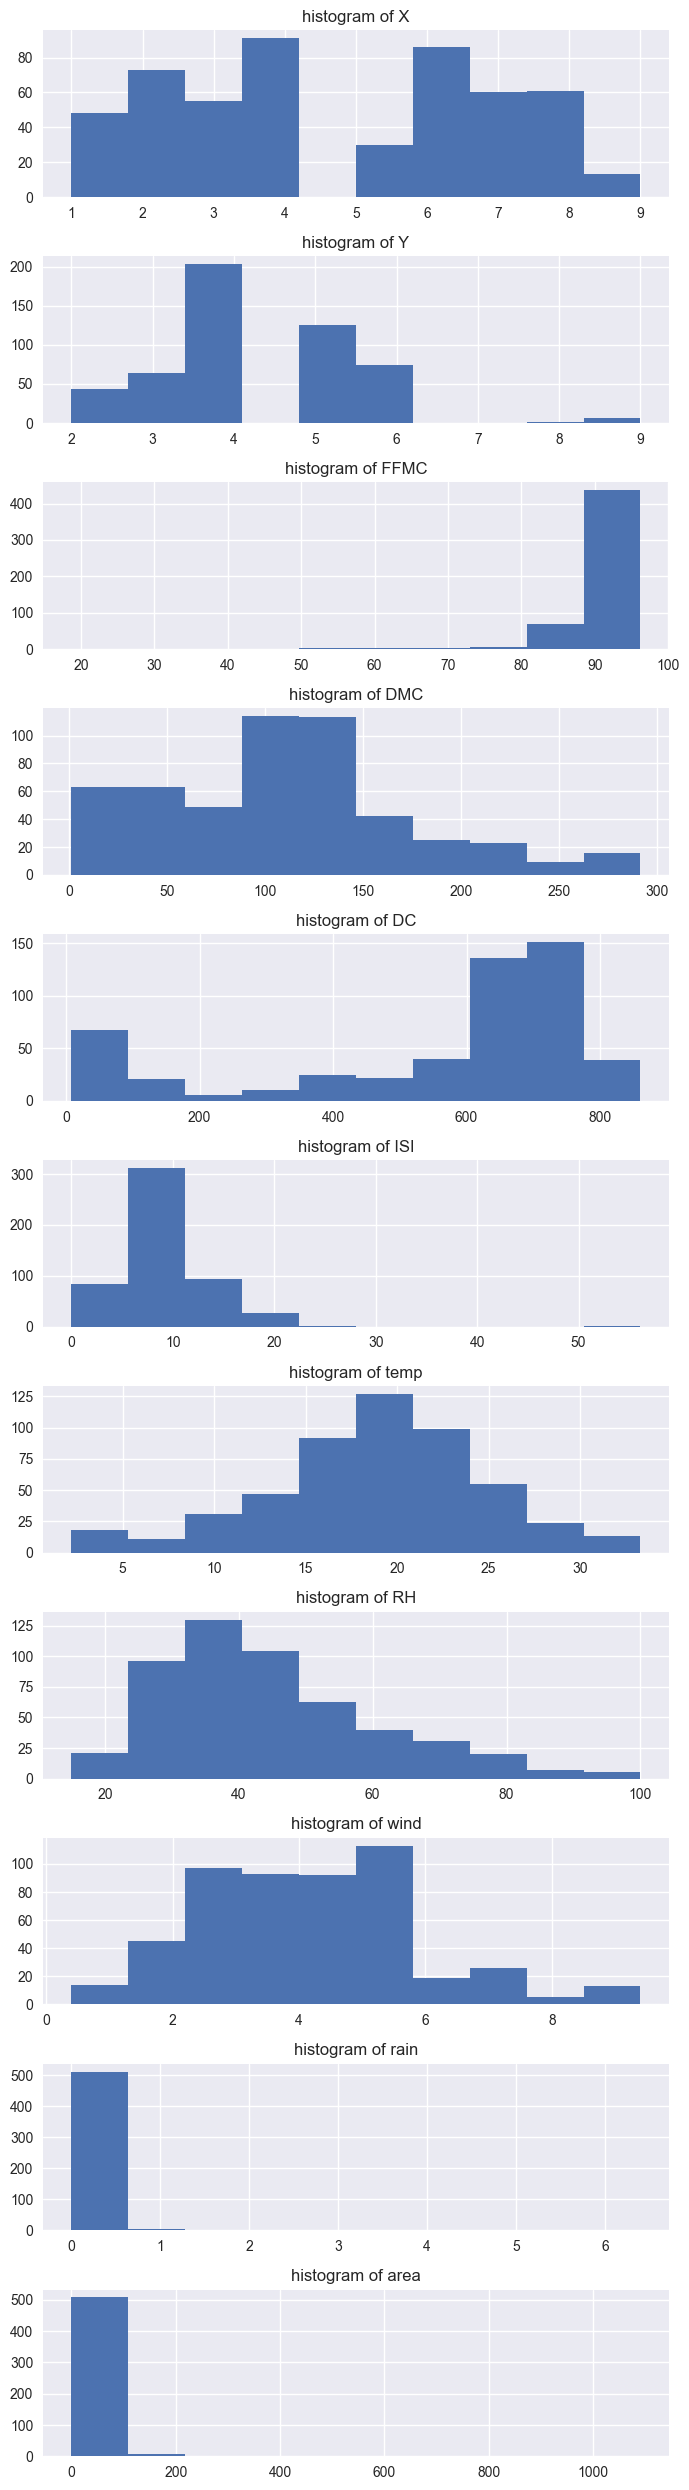

In [12]:
# subplots
fig, ax = plt.subplots(11, figsize = (7,25))

# initial index
index = 0
unused_column = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# visualizing
for column in unused_column:
    if column != 'is_summer':
        ax[index].hist(df[column])
        ax[index].title.set_text('histogram of ' + column)
        index += 1

# making plots visible
plt.tight_layout()

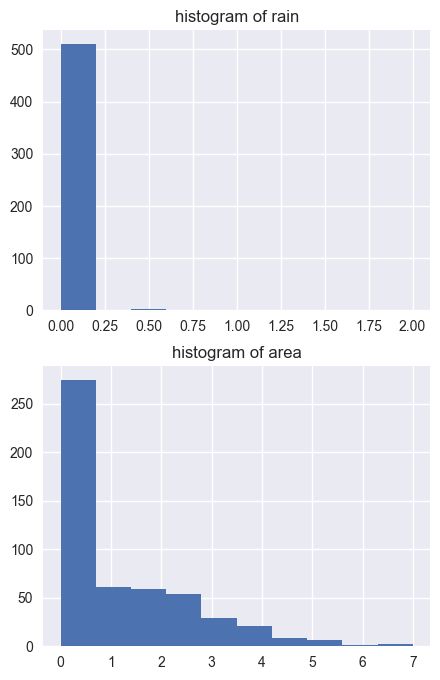

In [13]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['rain', 'area']] = df.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)

# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))

ax[0].hist(df['rain'])
ax[0].title.set_text('histogram of rain')

ax[1].hist(df['area'])
ax[1].title.set_text('histogram of area')

In [14]:
features = df.drop(['area'], axis = 1)
labels = df['area'].values.reshape(-1, 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size = 0.2,
                                                    random_state = 42)

X_train

,X,Y,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category,is_summer
329,4,3,sep,True,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,0,True
173,4,4,sep,False,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,0,True
272,2,5,aug,False,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,0,True
497,3,4,aug,False,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,1,True
182,5,4,feb,True,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,5,sep,True,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0,True
106,4,5,mar,False,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0,0,False
270,2,2,aug,False,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,0,True
435,2,5,jul,True,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0,0,True


In [16]:
# # fitting scaler
numeric_columns = ['X', 'Y','is_summer','is_weekend','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'size_category']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
sc_features = StandardScaler()

# transforming features
X_test[numeric_columns] = sc_features.fit_transform(X_test[numeric_columns])
X_train[numeric_columns] = sc_features.transform(X_train[numeric_columns])

X_train


,X,Y,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category,is_summer
329,-0.293766,-0.927776,sep,0.943880,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,-0.606977,0.53287
173,-0.293766,-0.161993,sep,-1.059457,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,-0.606977,0.53287
272,-1.130796,0.603791,aug,-1.059457,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,-0.606977,0.53287
497,-0.712281,-0.161993,aug,-1.059457,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.647509,0.53287
182,0.124750,-0.161993,feb,0.943880,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,1.647509,-1.87663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.293766,0.603791,sep,0.943880,0.989785,-0.366247,0.623858,0.911963,-0.203920,-0.411443,-0.273919,-0.137348,-0.606977,0.53287
106,-0.293766,0.603791,mar,-1.059457,0.096550,-1.334146,-1.915992,-0.388332,-0.118749,-0.939716,-0.548365,-0.137348,-0.606977,-1.87663
270,-1.130796,-1.693559,aug,-1.059457,0.312158,0.834731,0.483714,0.664288,0.494487,0.843205,-0.548365,-0.137348,-0.606977,0.53287
435,-1.130796,0.603791,jul,0.943880,-0.088257,-0.373364,-0.673602,-0.682447,0.835173,0.513034,-1.261926,-0.137348,-0.606977,0.53287


In [17]:

# features
# X_test = pd.DataFrame(X_test[numeric_columns], columns = features.columns)
# X_train = pd.DataFrame(X_train[numeric_columns], columns = features.columns)

# # labels
# y_test = pd.DataFrame(y_test, columns = ['size_category'])
# y_train = pd.DataFrame(y_train, columns = ['size_category'])
X_train = X_train[numeric_columns]
X_test = X_test[numeric_columns]

In [18]:
X_train.head()

,X,Y,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
329,-0.293766,-0.927776,0.53287,0.943880,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,-0.606977
173,-0.293766,-0.161993,0.53287,-1.059457,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,-0.606977
272,-1.130796,0.603791,0.53287,-1.059457,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,-0.606977
497,-0.712281,-0.161993,0.53287,-1.059457,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.647509
182,0.124750,-0.161993,-1.87663,0.943880,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,1.647509


In [19]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [20]:
print('Intercept is :',Linear_Regression.intercept_)
print('Coefficient is :',Linear_Regression.coef_)

Intercept is : [1.08000769]
Coefficient is : [[ 0.04079042  0.01183318  0.08854451 -0.03454194  0.0281423  -0.01162683
  -0.0164188  -0.14072384  0.08893064  0.03636713  0.06813228 -0.0549769
   1.17354009]]


In [21]:
print("Training Score:",Linear_Regression.score(X_train, y_train))
print("Test Score:",Linear_Regression.score(X_test,y_test))

Training Score: 0.7355885255388844
Test Score: 0.7278381253991871


In [22]:
Linear_Regression_predict = Linear_Regression.predict(X_test)
Linear_Regression_predict

array([[ 0.37732405],
       [ 0.23868201],
       [ 0.52971851],
       [ 0.34376066],
       [ 0.36017777],
       [ 0.27224179],
       [ 2.91724506],
       [ 3.16426819],
       [ 0.35986152],
       [ 0.45551804],
       [ 0.45948409],
       [ 0.40279992],
       [ 0.42239301],
       [ 0.45728322],
       [ 0.62281106],
       [ 0.42705173],
       [ 0.18278834],
       [ 0.32820836],
       [ 3.04883061],
       [ 3.00174366],
       [ 2.93849261],
       [ 3.04995197],
       [ 2.97168365],
       [ 3.08576903],
       [ 0.33097629],
       [ 0.48325518],
       [ 0.32327988],
       [ 0.38062416],
       [ 0.43025371],
       [ 0.32482597],
       [ 0.4500619 ],
       [ 3.10350194],
       [ 0.41916111],
       [ 0.5524671 ],
       [ 0.24173824],
       [ 3.27624564],
       [ 0.25718343],
       [ 3.14287103],
       [ 0.44099334],
       [ 0.37320243],
       [ 0.58525426],
       [ 0.34456882],
       [ 0.16584556],
       [ 0.46787757],
       [ 0.42929297],
       [ 0

In [23]:
Linear_Regression_predict = np.reshape(Linear_Regression_predict, 104)
# Linear_Regression_predict.shape

In [24]:
Linear_Regression_predict.shape

(104,)

In [25]:
Linear_Regression_predict

array([ 0.37732405,  0.23868201,  0.52971851,  0.34376066,  0.36017777,
        0.27224179,  2.91724506,  3.16426819,  0.35986152,  0.45551804,
        0.45948409,  0.40279992,  0.42239301,  0.45728322,  0.62281106,
        0.42705173,  0.18278834,  0.32820836,  3.04883061,  3.00174366,
        2.93849261,  3.04995197,  2.97168365,  3.08576903,  0.33097629,
        0.48325518,  0.32327988,  0.38062416,  0.43025371,  0.32482597,
        0.4500619 ,  3.10350194,  0.41916111,  0.5524671 ,  0.24173824,
        3.27624564,  0.25718343,  3.14287103,  0.44099334,  0.37320243,
        0.58525426,  0.34456882,  0.16584556,  0.46787757,  0.42929297,
        0.51624508,  0.16211263,  2.93125532,  0.4640973 ,  3.05152207,
        0.46966599,  3.14685846,  3.03622565,  0.34383928,  3.02404248,
        0.20512806,  0.09025245,  0.46835133,  0.49747266,  0.46331339,
        0.24662722,  2.96114824,  0.4619862 ,  0.27709746,  0.43091172,
        0.46962728,  0.40170623,  0.55526992,  3.09653539,  0.28

In [26]:
y_test = np.reshape(y_test, 104)
y_test.shape

(104,)

In [27]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Linear_Regression_predict})    
Actual_predicted

,Actual Revenue,Predicted Revenue
0,0.000000,0.377324
1,0.000000,0.238682
2,0.802002,0.529719
3,0.900161,0.343761
4,1.081805,0.360178
...,...,...
99,1.255616,0.441700
100,1.853168,0.260870
101,1.153732,0.189772
102,4.012592,3.259399


In [28]:
meanAbErr = metrics.mean_absolute_error(y_test, Linear_Regression_predict)
meanSqErr = metrics.mean_squared_error(y_test, Linear_Regression_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Linear_Regression_predict))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.582384436693244
Mean Square Error: 0.5981741256611178
Root Mean Square Error: 0.7734171744027397


In [29]:
# To find coefficient of determination
r2 =  r2_score(y_test, Linear_Regression_predict)
print("R-Square:",r2)

R-Square: 0.7278381253991871


In [30]:
features_coba = df.drop(['area','X','Y'], axis = 1)
labels_coba = df['area'].values.reshape(-1, 1)

In [31]:
features_coba

,month,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category,is_summer
0,mar,True,86.2,26.2,94.3,5.1,8.2,51,6.7,0.000000,0,False
1,oct,False,90.6,35.4,669.1,6.7,18.0,33,0.9,0.000000,0,False
2,oct,True,90.6,43.7,686.9,6.7,14.6,33,1.3,0.000000,0,False
3,mar,True,91.7,33.3,77.5,9.0,8.3,97,4.0,0.182322,0,False
4,mar,True,89.3,51.3,102.2,9.6,11.4,99,1.8,0.000000,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,True,81.6,56.7,665.6,1.9,27.8,32,2.7,0.000000,1,True
513,aug,True,81.6,56.7,665.6,1.9,21.9,71,5.8,0.000000,1,True
514,aug,True,81.6,56.7,665.6,1.9,21.2,70,6.7,0.000000,1,True
515,aug,True,94.4,146.0,614.7,11.3,25.6,42,4.0,0.000000,0,True


In [32]:
X_train_coba, X_test_coba, y_train_coba, y_test_coba = train_test_split(features_coba,
                                                                        labels_coba,
                                                                        test_size = 0.2,
                                                                        random_state = 42)

In [33]:
# fitting scaler

numeric_columns = ['is_summer','is_weekend','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'size_category']
sc_features = StandardScaler()

# transforming features
X_test_coba[numeric_columns] = sc_features.fit_transform(X_test_coba[numeric_columns])
X_train_coba[numeric_columns] = sc_features.transform(X_train_coba[numeric_columns])

In [34]:
# X_train = X_train[numeric_columns]
# X_test = X_test[numeric_columns]
X_test_coba = X_test_coba[numeric_columns]
X_train_coba = X_train_coba[numeric_columns]

In [35]:
X_train_coba.head()

,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
329,0.53287,0.943880,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,-0.606977
173,0.53287,-1.059457,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,-0.606977
272,0.53287,-1.059457,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,-0.606977
497,0.53287,-1.059457,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.647509
182,-1.87663,0.943880,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,1.647509


In [36]:
Lr_Rg = LinearRegression()
Lr_Rg.fit(X_train_coba, y_train_coba)

LinearRegression()

In [37]:
print('Intercept is :',Lr_Rg.intercept_)
print('Coefficient is :',Lr_Rg.coef_)

Intercept is : [1.07929061]
Coefficient is : [[ 0.0820995  -0.03754287  0.02870347 -0.0100824  -0.02140763 -0.14251929
   0.0974953   0.04595731  0.06817351 -0.05305415  1.17628921]]


In [38]:
print("Training Score:",Lr_Rg.score(X_train_coba, y_train_coba))
print("Test Score:",Lr_Rg.score(X_test_coba,y_test_coba))

Training Score: 0.7345310134331351
Test Score: 0.7259853195389043


In [39]:
Lasso_Regression = Lasso()
Lasso_Regression.fit(X_train_coba, y_train_coba)

Lasso()

In [40]:
print('Intercept is :',Lasso_Regression.intercept_)
print('Coefficient is :',Lasso_Regression.coef_)

Intercept is : [1.10377969]
Coefficient is : [ 0.         -0.          0.          0.          0.         -0.
  0.         -0.          0.          0.          0.17002018]


In [41]:
print("Training Score:",Lasso_Regression.score(X_train_coba, y_train_coba))
print("Test Score:",Lasso_Regression.score(X_test_coba,y_test_coba))

Training Score: 0.1952332762702057
Test Score: 0.1819770237917313


In [42]:
Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train_coba, y_train_coba)

Ridge()

In [43]:
print('Intercept is :',Ridge_Regression.intercept_)
print('Coefficient is :',Ridge_Regression.coef_)

Intercept is : [1.07961398]
Coefficient is : [[ 0.08123373 -0.03732934  0.02837802 -0.00946737 -0.02076802 -0.14045061
   0.09614134  0.04508403  0.06766705 -0.05271722  1.17334073]]


In [44]:
print("Training Score:",Ridge_Regression.score(X_train_coba, y_train_coba))
print("Test Score:",Ridge_Regression.score(X_test_coba,y_test_coba))

Training Score: 0.7345257875455742
Test Score: 0.7259303604959544


In [45]:
Support_Vector_Regressor = SVR()
Support_Vector_Regressor.fit(X_train_coba, y_train_coba)

D:\Personal\codes\python\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [46]:
print("Training Score:",Support_Vector_Regressor.score(X_train_coba, y_train_coba))
print("Test Score:",Support_Vector_Regressor.score(X_test_coba,y_test_coba))

Training Score: 0.7162786808117289
Test Score: 0.6909483409572448


In [47]:
Random_Forest_Regressor = RandomForestRegressor()
Random_Forest_Regressor.fit(X_train_coba, y_train_coba)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7836\430272192.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Random_Forest_Regressor.fit(X_train_coba, y_train_coba)


RandomForestRegressor()

In [48]:
print("Training Score:",Random_Forest_Regressor.score(X_train_coba, y_train_coba))
print("Test Score:",Random_Forest_Regressor.score(X_test_coba,y_test_coba))

Training Score: 0.9486286714540118
Test Score: 0.7091167202001083


In [49]:
K_Neighbors_Regressor = KNeighborsRegressor()
K_Neighbors_Regressor.fit(X_train_coba, y_train_coba)

KNeighborsRegressor()

In [50]:
print("Training Score:",K_Neighbors_Regressor.score(X_train_coba, y_train_coba))
print("Test Score:",K_Neighbors_Regressor.score(X_test_coba,y_test_coba))

Training Score: 0.7519811904285798
Test Score: 0.7112909756029067


In [51]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

Random_Forest_Regressor = RandomForestRegressor()
Random_rf = RandomizedSearchCV(Random_Forest_Regressor,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_coba, y_train_coba)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


D:\Personal\codes\python\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [52]:
best_random_grid=Random_rf.best_estimator_

In [53]:
print("Training Score:",Random_rf.score(X_train_coba, y_train_coba))
print("Test Score:",Random_rf.score(X_test_coba,y_test_coba))

Training Score: 0.8556093919035658
Test Score: 0.7219046966800169


In [54]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train_coba.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
10,size_category,0.730867
6,temp,0.045861
7,RH,0.039720
3,DMC,0.038893
2,FFMC,0.038047
4,DC,0.037039
5,ISI,0.033087
8,wind,0.027914
1,is_weekend,0.005811
0,is_summer,0.002233


In [55]:
file = bz2.BZ2File('Regression.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()